In [542]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



In [543]:
df= pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [544]:
# Fixing size.
def convert_BHK(x):
    try:
        return int(str(x).split(' ')[0])
    except:
        return None
    
df['BHK']= df['size'].apply(convert_BHK)
df1=df.drop(['size'],axis=1)
df1.isnull().sum()

area_type          0
availability       0
location           1
society         5502
total_sqft         0
bath              73
balcony          609
price              0
BHK               16
dtype: int64

In [545]:
df2= df1.dropna(subset=['location','BHK','bath'])
df2.isnull().sum()

area_type          0
availability       0
location           0
society         5499
total_sqft         0
bath               0
balcony          536
price              0
BHK                0
dtype: int64

In [546]:
df2

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453,4.0,0.0,231.00,5.0
13316,Super built-up Area,Ready To Move,Richards Town,NaN,3600,5.0,NaN,400.00,4.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141,2.0,1.0,60.00,2.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,SollyCl,4689,4.0,1.0,488.00,4.0


In [547]:
# fixing total_sqft.
def convert_total_sqft(x):
    try:
        if '-' in str(x): #checking if the sting contains -(100-200)
            tokens= str(x).split('-')
            if len(tokens)==2:
                return float(tokens[0].strip()) + float(tokens[1].strip())/2
            
        return float(x)
    
    except:
        return None
    
df2= df2.copy()
df2['total_squareft']= df2['total_sqft'].apply(convert_total_sqft)
df3= df2.drop(['total_sqft'],axis=1)
df3





,area_type,availability,location,society,bath,balcony,price,BHK,total_squareft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,2.0,1.0,39.07,2.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,120.00,4.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,2.0,3.0,62.00,3.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,95.00,3.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,NaN,2.0,1.0,51.00,2.0,1200.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,4.0,0.0,231.00,5.0,3453.0
13316,Super built-up Area,Ready To Move,Richards Town,NaN,5.0,NaN,400.00,4.0,3600.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,2.0,1.0,60.00,2.0,1141.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,SollyCl,4.0,1.0,488.00,4.0,4689.0


In [548]:
df3.isna().sum()

area_type            0
availability         0
location             0
society           5499
bath                 0
balcony            536
price                0
BHK                  0
total_squareft      46
dtype: int64

In [549]:
median_sqft= df3['total_squareft'].median()
df3['total_squareft']= df3['total_squareft'].fillna(median_sqft)
df3.isna().sum()

area_type            0
availability         0
location             0
society           5499
bath                 0
balcony            536
price                0
BHK                  0
total_squareft       0
dtype: int64

In [550]:
df3

,area_type,availability,location,society,bath,balcony,price,BHK,total_squareft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,2.0,1.0,39.07,2.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,120.00,4.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,2.0,3.0,62.00,3.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,95.00,3.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,NaN,2.0,1.0,51.00,2.0,1200.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,4.0,0.0,231.00,5.0,3453.0
13316,Super built-up Area,Ready To Move,Richards Town,NaN,5.0,NaN,400.00,4.0,3600.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,2.0,1.0,60.00,2.0,1141.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,SollyCl,4.0,1.0,488.00,4.0,4689.0


In [551]:
df3['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [552]:
df3['BHK'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., 27., 10., 19.,
       16., 43., 14., 12., 13., 18.])

In [553]:
df3['total_squareft'].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.], shape=(1965,))

In [554]:
# Convert columns to numeric (in case they aren't already)
df3['total_squareft'] = pd.to_numeric(df3['total_squareft'], errors='coerce')
df3['BHK'] = pd.to_numeric(df3['BHK'], errors='coerce')
df3['bath'] = pd.to_numeric(df3['bath'], errors='coerce')

# Apply both outlier removal rules
df3 = df3[
    (df3['total_squareft'] / df3['BHK'] >= 300) &
    (df3['bath'] <= df3['BHK'] + 2)]
df4=df3.copy()
df4=df4.drop(['society'],axis=1)



In [555]:
df4

,area_type,availability,location,bath,balcony,price,BHK,total_squareft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2.0,1200.0
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,4.0,0.0,231.00,5.0,3453.0
13316,Super built-up Area,Ready To Move,Richards Town,5.0,NaN,400.00,4.0,3600.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1.0,60.00,2.0,1141.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,1.0,488.00,4.0,4689.0


In [556]:
df4['BHK'].unique()

array([ 2.,  4.,  3.,  1.,  8.,  6.,  5.,  7., 11.,  9., 10., 16., 13.])

In [557]:
location_counts=df4['location'].value_counts()
location_counts


location
Whitefield               533
Sarjapur  Road           388
Electronic City          293
Kanakpura Road           264
Thanisandra              231
                        ... 
Sindhi Colony              1
Kanakapura main  Road      1
Zuzuvadi                   1
Kavika Layout              1
JakkurYelahanka            1
Name: count, Length: 1220, dtype: int64

In [558]:
location_counts = df4['location'].value_counts()
rare_locations = location_counts[location_counts <= 10].index


In [559]:
df4['location'] = df4['location'].apply(lambda x: 'Other' if x in rare_locations else x)

In [560]:
df4['location'].value_counts()['Other']


np.int64(2726)

In [561]:
df4.isnull().sum()

area_type           0
availability        0
location            0
bath                0
balcony           442
price               0
BHK                 0
total_squareft      0
dtype: int64

In [562]:
df5=df4.dropna(subset=['balcony'])
df5

,area_type,availability,location,bath,balcony,price,BHK,total_squareft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2.0,1200.0
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3.0,3.0,112.00,3.0,1715.0
13315,Built-up Area,Ready To Move,Whitefield,4.0,0.0,231.00,5.0,3453.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1.0,60.00,2.0,1141.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,1.0,488.00,4.0,4689.0


In [563]:
df5.isnull().sum()

area_type         0
availability      0
location          0
bath              0
balcony           0
price             0
BHK               0
total_squareft    0
dtype: int64

In [564]:
df5= pd.get_dummies(df5,columns=['location'],drop_first=True)
df5

,area_type,availability,bath,balcony,price,BHK,total_squareft,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_5th Phase JP Nagar,...,location_Vasanthapura,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,Super built-up Area,19-Dec,2.0,1.0,39.07,2.0,1056.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Plot Area,Ready To Move,5.0,3.0,120.00,4.0,2600.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Built-up Area,Ready To Move,2.0,3.0,62.00,3.0,1440.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,3.0,1521.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,2.0,1200.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,3.0,3.0,112.00,3.0,1715.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13315,Built-up Area,Ready To Move,4.0,0.0,231.00,5.0,3453.0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
13317,Built-up Area,Ready To Move,2.0,1.0,60.00,2.0,1141.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,Super built-up Area,18-Jun,4.0,1.0,488.00,4.0,4689.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [565]:
df6= df5.drop(['area_type','availability'],axis=1)
df6

,bath,balcony,price,BHK,total_squareft,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vasanthapura,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2.0,1.0,39.07,2.0,1056.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5.0,3.0,120.00,4.0,2600.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,3.0,62.00,3.0,1440.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.0,1.0,95.00,3.0,1521.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,1.0,51.00,2.0,1200.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,3.0,3.0,112.00,3.0,1715.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13315,4.0,0.0,231.00,5.0,3453.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
13317,2.0,1.0,60.00,2.0,1141.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,4.0,1.0,488.00,4.0,4689.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [566]:
df6.shape

(12043, 228)

In [567]:
df4['location'].value_counts()['Other']


np.int64(2726)

In [568]:
df4[df4['location'] == 'Other']


,area_type,availability,location,bath,balcony,price,BHK,total_squareft
18,Super built-up Area,Ready To Move,Other,4.0,2.0,290.00,3.0,2770.0
19,Super built-up Area,Ready To Move,Other,2.0,2.0,48.00,2.0,1100.0
24,Super built-up Area,18-Nov,Other,1.0,0.0,25.25,1.0,510.0
25,Super built-up Area,18-May,Other,3.0,2.0,56.00,3.0,1250.0
42,Super built-up Area,Ready To Move,Other,1.0,0.0,38.00,1.0,600.0
...,...,...,...,...,...,...,...,...
13291,Plot Area,18-Jan,Other,1.0,0.0,26.00,1.0,812.0
13292,Super built-up Area,18-Jul,Other,2.0,2.0,63.93,3.0,1440.0
13302,Super built-up Area,Ready To Move,Other,2.0,2.0,48.00,2.0,1075.0
13306,Plot Area,Ready To Move,Other,5.0,NaN,325.00,4.0,1200.0


In [569]:
# checking for the right column(228).
location_counts = df4['location'].value_counts()
#locations with more than 10 data points
locations_gt_10 = location_counts[location_counts > 10]
print(f"Number of locations with >10 entries: {len(locations_gt_10)}")


Number of locations with >10 entries: 224


In [570]:
# Q1 = df6['price'].quantile(0.25)
# Q3 = df6['price'].quantile(0.75)
# IQR = Q3 - Q1
# df6 = df6[(df6['price'] >= Q1 - 1.5 * IQR) & (df6['price'] <= Q3 + 1.5 * IQR)].copy()


In [571]:
df6 = df6[df6['price'] >= 10].copy()
df6.shape


(12042, 228)

In [572]:
df6['price'] = np.log1p(df6['price'])

In [573]:
X = df6.drop(['price'], axis=1)
y = df6['price']

# Use pipeline without ColumnTransformer
pipe = Pipeline([
    ('model', LGBMRegressor())
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.1],
    'model__max_depth': [5, 10],
    'model__num_leaves': [31, 63],
    'model__min_child_samples': [5, 10],
    'model__subsample': [0.8],
    'model__colsample_bytree': [0.8]
}

from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Predict
from sklearn.metrics import r2_score
print("R² Score:", r2_score(y_test, grid.predict(X_test)))


new_data = np.zeros(X.shape[1])  # Same number of columns
columns = X.columns.tolist()

# Manually set feature values
new_data[columns.index('total_squareft')] = 15000
new_data[columns.index('BHK')] = 3
new_data[columns.index('bath')] = 3
new_data[columns.index('location_Whitefield')] = 1  # Set location

# Convert to 2D array and predict
predicted_price = grid.predict([new_data])[0]
actual_price = np.expm1(predicted_price)
print("Predicted price:", predicted_price, "lakhs")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 727
[LightGBM] [Info] Number of data points in the train set: 9633, number of used features: 227
[LightGBM] [Info] Start training from score 4.358162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\mayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [574]:
print(df6.columns)

Index(['bath', 'balcony', 'price', 'BHK', 'total_squareft',
       'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout',
       'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar',
       'location_7th Phase JP Nagar',
       ...
       'location_Vasanthapura', 'location_Vidyaranyapura',
       'location_Vijayanagar', 'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=228)


In [575]:
print(df3['price'].describe())


count    12485.000000
mean       110.429280
std        146.080093
min          9.000000
25%         49.000000
50%         70.000000
75%        115.000000
max       2912.000000
Name: price, dtype: float64


In [576]:
def predict_price(location, BHK, bath, total_squareft, grid, reference_columns):
    


    new_data = pd.DataFrame([{
        'location': location,
        'BHK': BHK,
        'bath': bath,
        'total_squareft': total_squareft
    }])

    new_data_encoded = pd.get_dummies(new_data)


    new_data_encoded = new_data_encoded.reindex(columns=reference_columns, fill_value=0)
    reference_columns=X_train.columns

    predicted_price = grid.predict(new_data_encoded)

    return predicted_price




In [577]:
reference_columns = X_train.columns 
predicted_price = predict_price("Whitefield", 3, 3, 1500, grid, reference_columns)
print("Predicted price:", predicted_price)


Predicted price: [4.38576869]


In [578]:
model_params={
    'lightgbm':{
      'model': LGBMRegressor(random_state=42),
      'params':{
          'n_estimators': [100, 200],
          'learning_rate': [0.1],
          'max_depth': [5, 10],
          'num_leaves': [31, 63],
          'min_child_samples': [5, 10],
          'subsample': [0.8],
          'colsample_bytree': [0.8]
         }
     }

}

In [579]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=3,n_jobs=-1,verbose=1, return_train_score=False)
    clf.fit(X_train, y_train)
    clf.predict
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

results = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(results)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 727
[LightGBM] [Info] Number of data points in the train set: 9633, number of used features: 227
[LightGBM] [Info] Start training from score 4.358162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

In [580]:
# Create new input sample
new_data = pd.DataFrame([{
    'location': 'location_1st Phase JP Nagar	',
    'BHK': 2,
    'bath': 2,
    'total_sqft': 1000
}])

# Perform the same one-hot encoding as on the training data
new_data_encoded = pd.get_dummies(new_data)

# Align columns with training data
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)


predicted_price = grid.predict(new_data_encoded)
print("Predicted price:", predicted_price[0])


Predicted price: 3.304327582945099


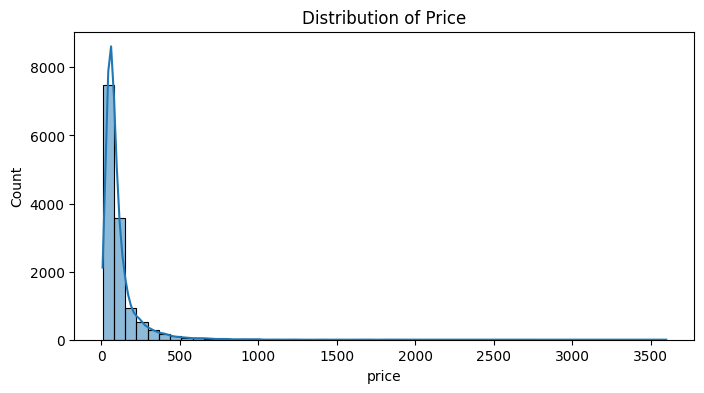

In [581]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Price")
plt.show()


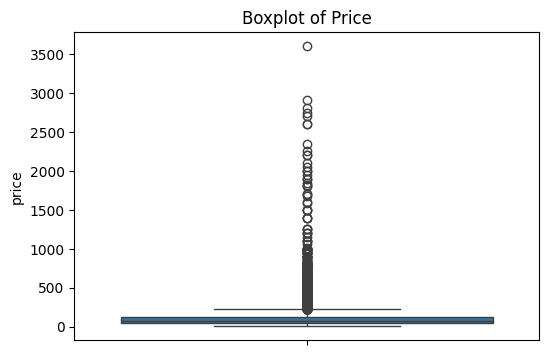

In [582]:
plt.figure(figsize=(6,4))
sns.boxplot(df['price'])
plt.title("Boxplot of Price")
plt.show()
